## PREDICT STOCK PRICE OF FINANCIAL SERVICE COMPANY - BAJAJ FINSERV

TEAM MEMBERS:
    
| NAME| STUDENT ID|
|---|---| 
| NGUYỄN NGỌC PHUNG | MAMAIU18028| 
| HUỲNH TẤN VŨ | MAMAIU18044 |  

___

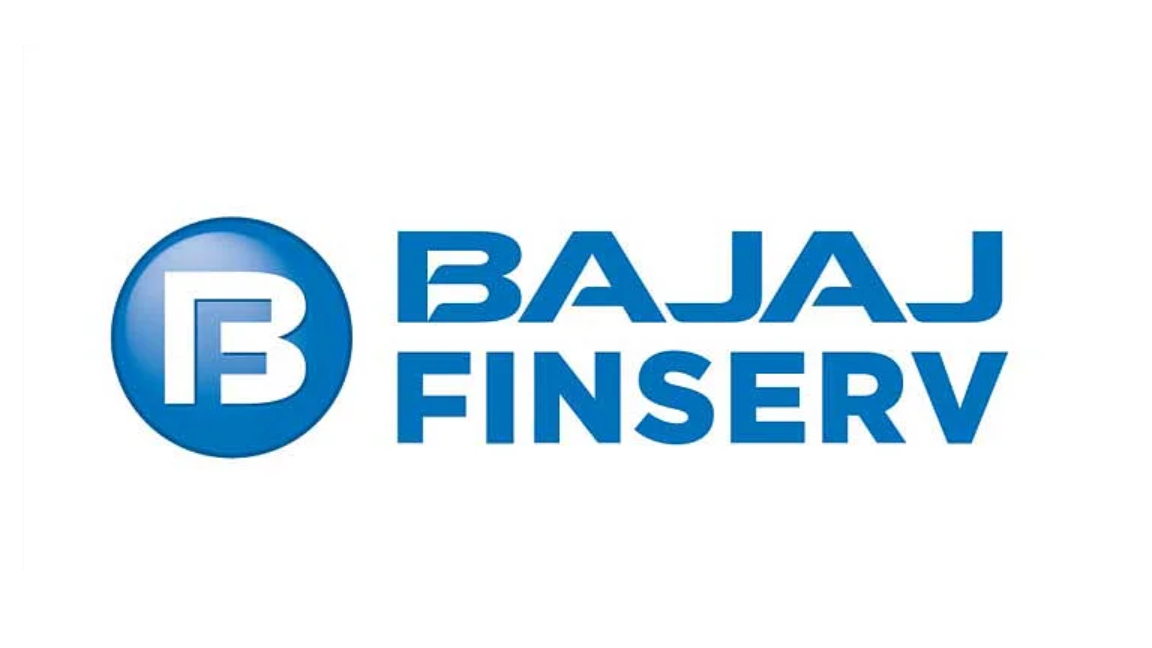

In [2]:
from IPython.display import Image
Image(filename = "C:/Users/Win 10/Pictures/abcd.png", width = 600, height = 300)

#### IMPORT THE LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [33]:
from matplotlib.pyplot import figure

#### IMPORT THE DATASET

In [5]:
data=pd.read_csv('C:/Users/Win 10/Downloads/BAJFINANCE.csv')
data.set_index('Date',inplace=True)
data.head(10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
2000-01-10,BAJAUTOFIN,EQ,42.90,42.05,44.90,41.0,43.00,42.90,42.47,4700,1.996100e+10,NaN,NaN,NaN
2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.5,40.25,40.10,40.25,5500,2.213900e+10,NaN,NaN,NaN
2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.0,39.00,39.00,39.80,1000,3.980000e+09,NaN,NaN,NaN
2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.5,39.50,39.50,39.37,1000,3.937000e+09,NaN,NaN,NaN


##### TARGET VARIABLE FOR PREDICTION: VWAP - VOLUME WEIGHTED AVERAGE PRICE

The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price

PLOTTING OF VWAP THROUGHOUT THE TIME FRAME

<AxesSubplot:xlabel='Date'>

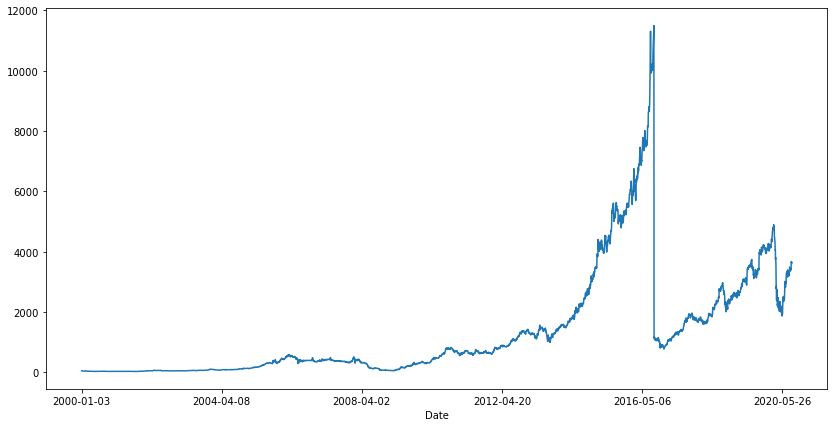

In [6]:
data['VWAP'].plot(figsize=(14,7))

#### DATA PREPROCESSING

In [7]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [10]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [8]:
data.shape

(5070, 14)

##### HANDLE MISSING VALUE

In [9]:
data.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [12]:
data[['Trades','Deliverable Volume','%Deliverble']].head()

,Trades,Deliverable Volume,%Deliverble
Date,,,
2000-01-03,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN


In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data[['Trades','Deliverable Volume','%Deliverble']])
data[['Trades','Deliverable Volume','%Deliverble']]=imputer.transform(data[['Trades','Deliverable Volume','%Deliverble']])

In [17]:
data.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

##### GENERATING INDEPENDENT VARIABLES 

In [19]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=7
window2=30

In [20]:
for feature in lag_features:
    data[feature+'rolling_mean_week']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_month']=data[feature].rolling(window=window2).mean()

In [21]:
for feature in lag_features:
    data[feature+'rolling_std_week']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_month']=data[feature].rolling(window=window2).std()

In [23]:
data.dropna(inplace=True)
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_week,Highrolling_std_month,Lowrolling_std_week,Lowrolling_std_month,Volumerolling_std_week,Volumerolling_std_month,Turnoverrolling_std_week,Turnoverrolling_std_month,Tradesrolling_std_week,Tradesrolling_std_month
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-14,BAJAUTOFIN,EQ,48.80,50.75,50.75,44.90,44.90,44.90,47.09,4800,...,4.586107,4.183431,4.162517,3.476326,3631.738400,2603.942634,1.760716e+10,1.216892e+10,0.0,0.0
2000-02-15,BAJAUTOFIN,EQ,44.90,42.05,43.00,41.35,41.35,41.35,41.69,6200,...,3.954819,3.923052,3.741307,3.275420,3215.587038,2567.097292,1.570419e+10,1.177308e+10,0.0,0.0
2000-02-16,BAJAUTOFIN,EQ,41.35,38.30,41.50,38.30,39.95,39.70,40.54,6000,...,3.744981,3.399841,3.562620,2.929723,3157.756889,2574.876406,1.535165e+10,1.177360e+10,0.0,0.0
2000-02-17,BAJAUTOFIN,EQ,39.70,38.70,42.80,38.70,41.70,41.40,40.69,4600,...,3.620527,3.268052,3.438836,2.783849,3228.223749,2561.509971,1.548772e+10,1.174730e+10,0.0,0.0
2000-02-18,BAJAUTOFIN,EQ,41.40,40.00,41.85,39.50,41.00,40.80,40.50,4200,...,3.613599,3.190912,3.559812,2.740354,3467.467856,2554.500199,1.663965e+10,1.168861e+10,0.0,0.0


In [26]:
X_variable=['Highrolling_mean_week', 'Highrolling_mean_month',
       'Lowrolling_mean_week', 'Lowrolling_mean_month',
       'Volumerolling_mean_week', 'Volumerolling_mean_month',
       'Turnoverrolling_mean_week', 'Turnoverrolling_mean_month',
       'Tradesrolling_mean_week', 'Tradesrolling_mean_month',
       'Highrolling_std_week', 'Highrolling_std_month', 'Lowrolling_std_week',
       'Lowrolling_std_month', 'Volumerolling_std_week',
       'Volumerolling_std_month', 'Turnoverrolling_std_week',
       'Turnoverrolling_std_month', 'Tradesrolling_std_week',
       'Tradesrolling_std_month']

##### SPLITING DATA INTO TRAIN SET AND TEST SET

In [27]:
TRAIN_SET= data[0:3000]
TEST_SET = data[3000:]

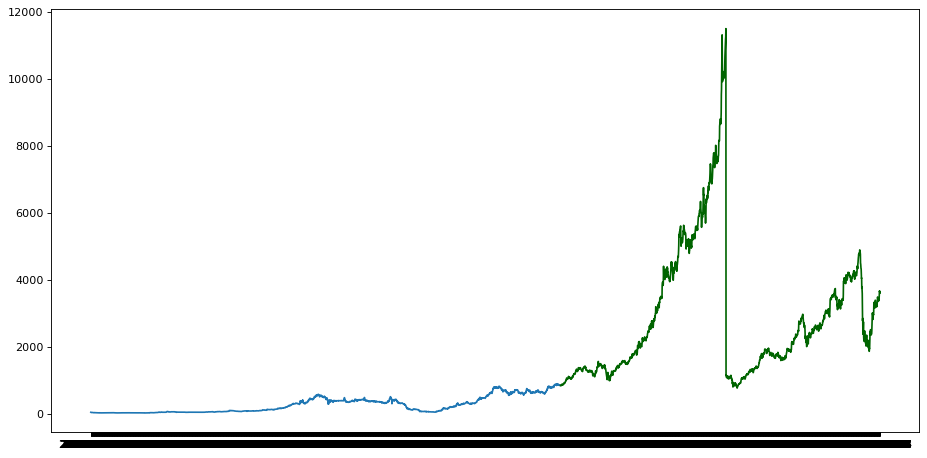

In [34]:
figure(figsize=(14,7), dpi=80)
plt.plot(TRAIN_SET['VWAP'])
plt.plot(TEST_SET['VWAP'], color='darkgreen')

#### BUILDING AUTO-ARIMA MODEL 

In [35]:
MODEL=auto_arima(y=TRAIN_SET['VWAP'],exogenous=TRAIN_SET[X_variable],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20474.645, Time=5.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23365.519, Time=3.45 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20613.778, Time=3.65 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23357.552, Time=4.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=44383.624, Time=3.47 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=20470.779, Time=5.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=21220.388, Time=5.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20495.070, Time=4.82 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=20464.978, Time=5.47 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=20813.500, Time=5.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=20394.676, Time=5.94 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=20396.725, Time=6.42 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=20395.602, Time=6.52 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=20452.056, Time=6.01 sec
 ARIMA(3,0,2)(0,0,0

In [36]:
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3000
Model:               SARIMAX(5, 0, 5)   Log Likelihood              -10158.463
Date:                Tue, 18 May 2021   AIC                          20378.927
Time:                        15:40:55   BIC                          20565.124
Sample:                             0   HQIC                         20445.901
                               - 3000                                         
Covariance Type:                  opg                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Highrolling_mean_week          0.3486    2.7e-22   1.29e+21      0.000       0.349       0.349
Highrolling_mean_month         0.2202    2.7e-22   8.16e+20      0.000       0.220       0.220
Lowrolling_mean_week           0.7834   2.54e-22   3.09e+21      0.000       0.783       0.783
Lowrolling_mean_month         -0.3553   2.56e-22  -1.39e+21      0.000      -0.355      -0.355
Volumerolling_mean_week        0.0002   3.57e-21   4.72e+16      0.000       0.000       0.000
Volumerolling_mean_month   -8.504e-05   1.27e-20  -6.67e+15      0.000    -8.5e-05    -8.5e-05
Turnoverrolling_mean_week  -2.488e-12   2.55e-13     -9.758      0.000   -2.99e-12   -1.99e-12
Turnoverrolling_mean_month  3.264e-12   5.23e-13      6.242      0.000    2.24e-12    4.29e-12
Tradesrolling_mean_week        0.0009   1.67e-20   5.35e+16      0.000       0.001       0.001
Tradesrolling_mean_month      -0.0009   1.71e-20   -5.2e+16      0.000      -0.001      -0.001
Highrolling_std_week           0.8276   1.14e-23   7.28e+22      0.000       0.828       0.828
Highrolling_std_month         -0.1928   1.57e-23  -1.23e+22      0.000      -0.193      -0.193
Lowrolling_std_week           -0.7987   1.14e-23  -7.04e+22      0.000      -0.799      -0.799
Lowrolling_std_month           0.1281   1.59e-23   8.07e+21      0.000       0.128       0.128
Volumerolling_std_week     -8.863e-05   8.14e-21  -1.09e+16      0.000   -8.86e-05   -8.86e-05
Volumerolling_std_month     9.167e-06   3.73e-21   2.45e+15      0.000    9.17e-06    9.17e-06
Turnoverrolling_std_week     2.19e-12   1.54e-13     14.190      0.000    1.89e-12    2.49e-12
Turnoverrolling_std_month  -1.347e-12   2.47e-13     -5.458      0.000   -1.83e-12   -8.63e-13
Tradesrolling_std_week         0.0006   1.26e-22   4.62e+18      0.000       0.001       0.001
Tradesrolling_std_month        0.0007   1.94e-22   3.56e+18      0.000       0.001       0.001
ar.L1                          1.4131    2.2e-23   6.41e+22      0.000       1.413       1.413
ar.L2                         -0.7377   1.99e-23  -3.71e+22      0.000      -0.738      -0.738
ar.L3                         -0.1410   1.68e-23  -8.41e+21      0.000      -0.141      -0.141
ar.L4                          0.4388   1.32e-23   3.33e+22      0.000       0.439       0.439
ar.L5                         -0.2345   1.18e-23  -1.99e+22      0.000      -0.234      -0.234
ma.L1                         -0.5064   7.61e-24  -6.66e+22      0.000      -0.506      -0.506
ma.L2                          0.1393   7.58e-24   1.84e+22      0.000       0.139       0.139
ma.L3                          0.3132   6.75e-24   4.64e+22      0.000       0.313       0.313
ma.L4                         -0.1643   2.92e-24  -5.63e+22      0.000      -0.164      -0.164
ma.L5                         -0.0660   4.28e-24  -1.54e+22      0.000      -0.066      -0.066
sigma2                        51.4423   4.36e-26   1.18e+27      0.000      51.442      51.442
===========

In [37]:
MODEL.fit(TRAIN_SET['VWAP'],TRAIN_SET[X_variable])

ARIMA(order=(5, 0, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [39]:
PREDICTED_VWAP=MODEL.predict(n_periods=len(TEST_SET), exogenous=TEST_SET[X_variable])
TEST_SET['PREDICTED_VWAP_ARIMA(5,0,5)']=PREDICTED_VWAP

#### VISUALIZATION

<AxesSubplot:xlabel='Date'>

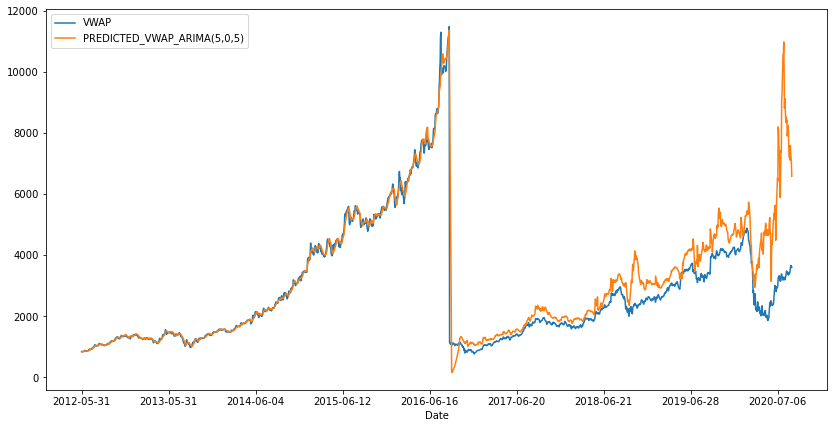

In [40]:
TEST_SET[['VWAP','PREDICTED_VWAP_ARIMA(5,0,5)']].plot(figsize=(14,7))

#### MODEL PERFORMANCE EVALUATION

Typically, when we are comparing forecasted price and actual price,the following evaluation metric is often considered:
    
    1. Mean Absolute Percentage Error (MAPE)
    2. Correlation between the Actual and the Forecast (corr)
    3. Min-Max Error (minmax)

In [43]:
def accuracy_metric(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

In [44]:
accuracy_metric(TEST_SET['PREDICTED_VWAP_ARIMA(5,0,5)'],TEST_SET['VWAP'])

{'mape': 0.16181198089970494,
 'me': 343.1922179720062,
 'mae': 394.258799788675,
 'mpe': 0.13930808503319736,
 'rmse': 932.3885541562029,
 'corr': 0.9118984471353982,
 'minmax': 0.10497132260622244}